## Q1. Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q2.import csv file Diwali Sales Data.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Diwali Sales Data.csv to Diwali Sales Data (1).csv


## Q3. Find the shape of the data

In [1]:
import pandas as pd

# Define the file path
file_path = "Diwali Sales Data.csv"

# Read the CSV file using the appropriate encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Get and print the shape of the DataFrame
print("Shape of the dataset:", df.shape)


Shape of the dataset: (11251, 15)


## Q4. Fetch the first five rows of the dataset

In [ ]:
import pandas as pd

# Define the file path
file_path = "Diwali Sales Data.csv"

# Read the CSV file using the appropriate encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Q5. Get the complete info of the dataset

In [ ]:
import pandas as pd

# Define the file path
file_path = "Diwali Sales Data.csv"

# Read the CSV file using the appropriate encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [2]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

## Q7. Check for null values and find which columns have null values

In [3]:
#check for null values
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [4]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Q9. Plot a bar chart for Gender and it's count

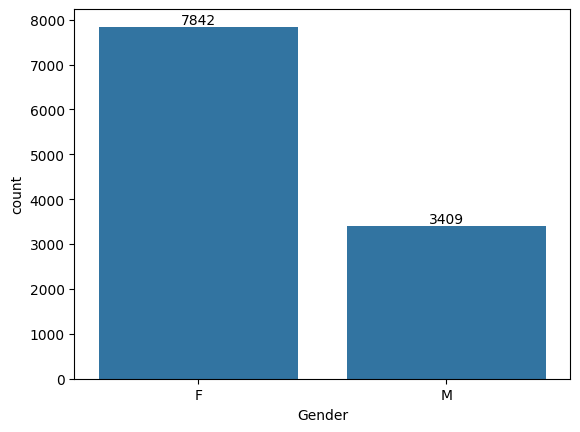

In [6]:
# plotting a bar chart for Gender and it's count
import seaborn as sns
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

## Q10. Plot a bar chart for gender vs total amount

In [8]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

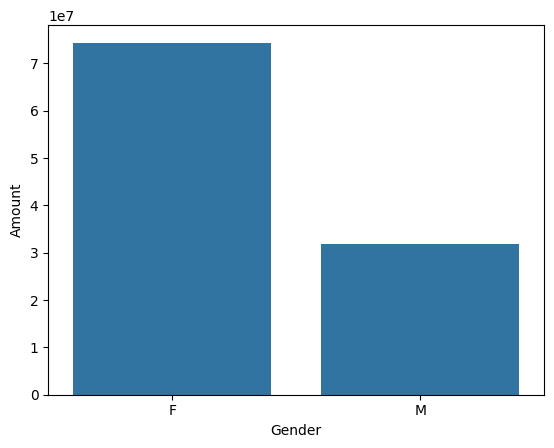

In [9]:
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

## Q11. Plot the countplot for Age Group with hue and Gender

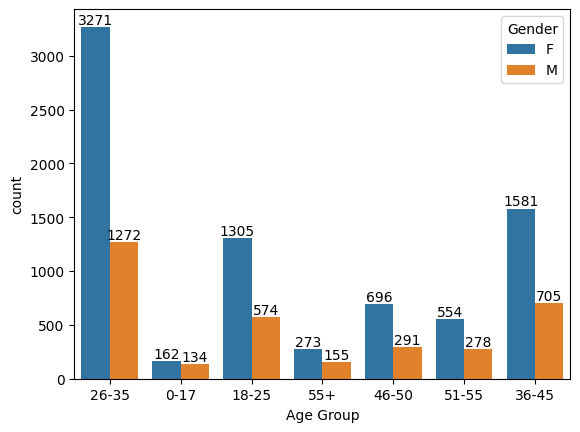

In [ ]:
import seaborn as sns
ax = sns.countplot(x='Age Group', data=df, hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

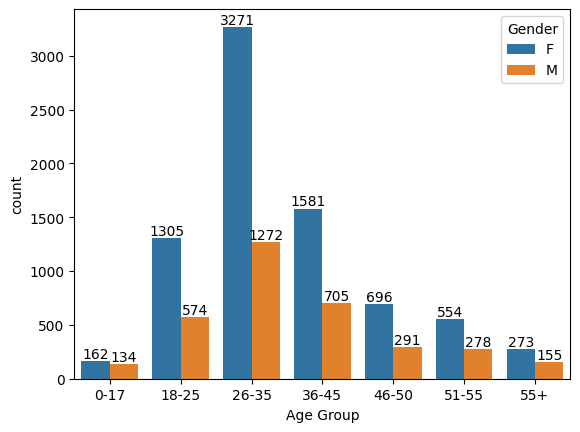

In [ ]:
# For the sorted values of the x axis
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom age group order
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Plot with custom order
ax = sns.countplot(x='Age Group', data=df, hue='Gender', order=age_order)

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


## Q12. Draw the plot for total number of orders from top 10 states

<Axes: xlabel='State', ylabel='Orders'>

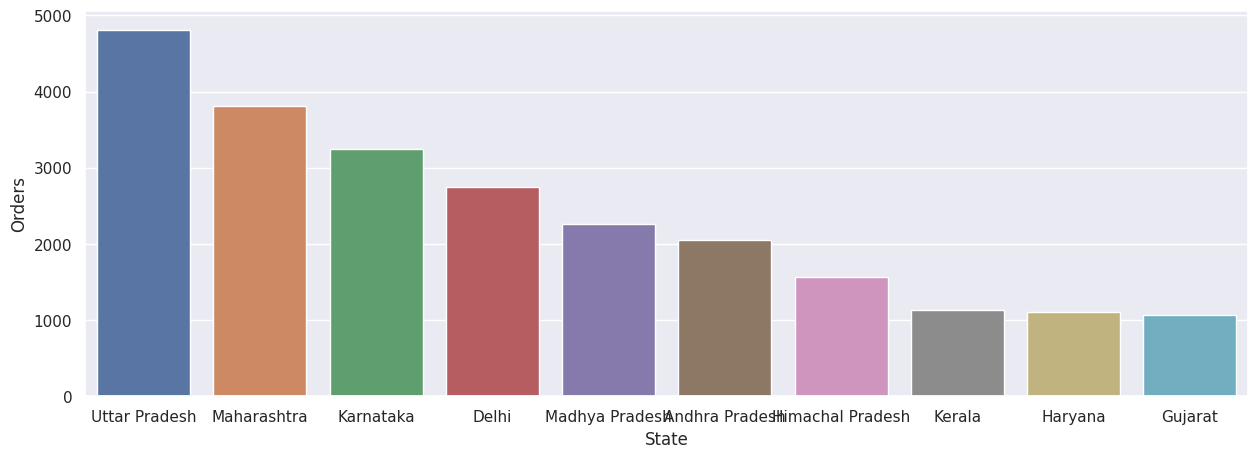

In [ ]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', hue = 'State')

## Q13.Draw the plot to plot total amount/sales from top 10 states

<Axes: xlabel='Amount', ylabel='Orders'>

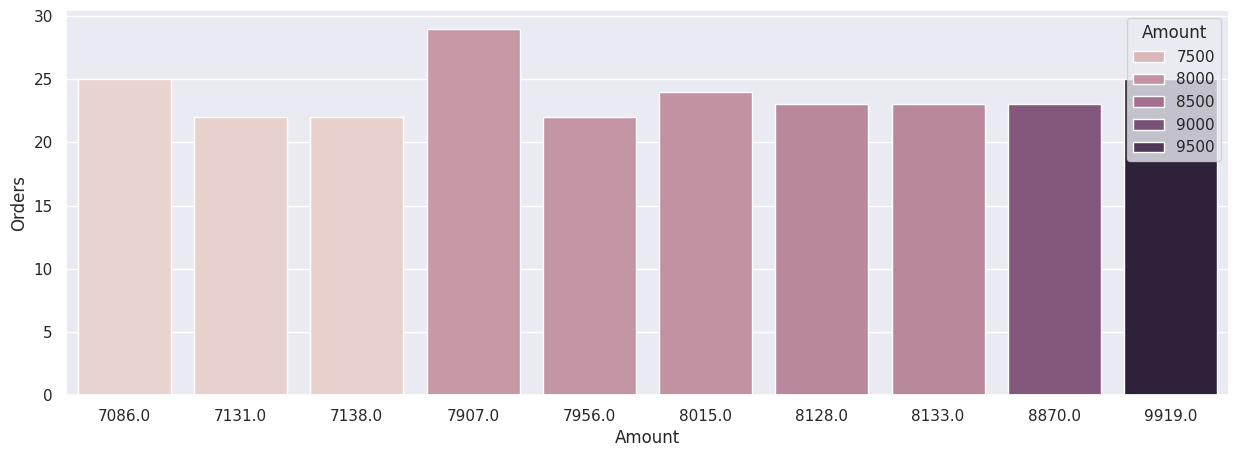

In [ ]:
sales_state = df.groupby(['Amount'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'Amount',y= 'Orders', hue = 'Amount')

## Q14. Draw the plot to show the marital status

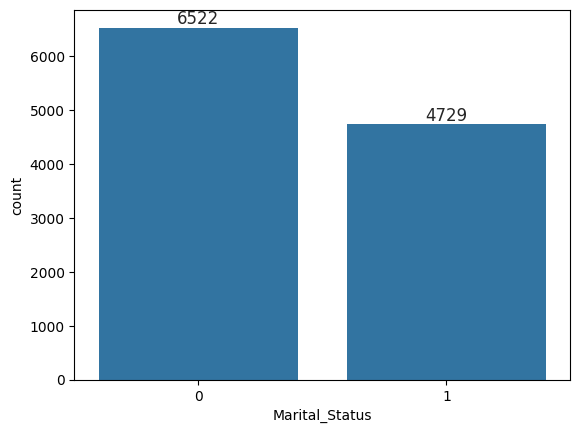

In [10]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

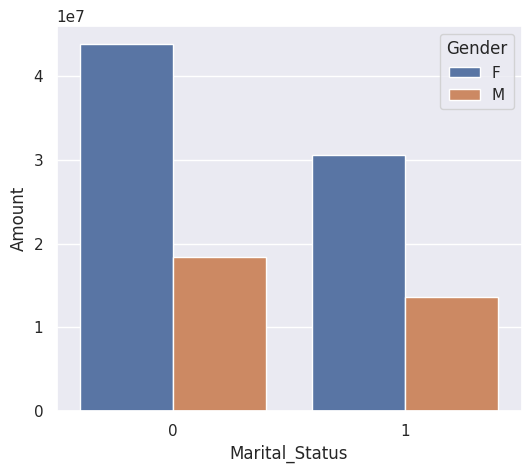

In [11]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

## Q15. Draw the plot to show the top 10 occupations

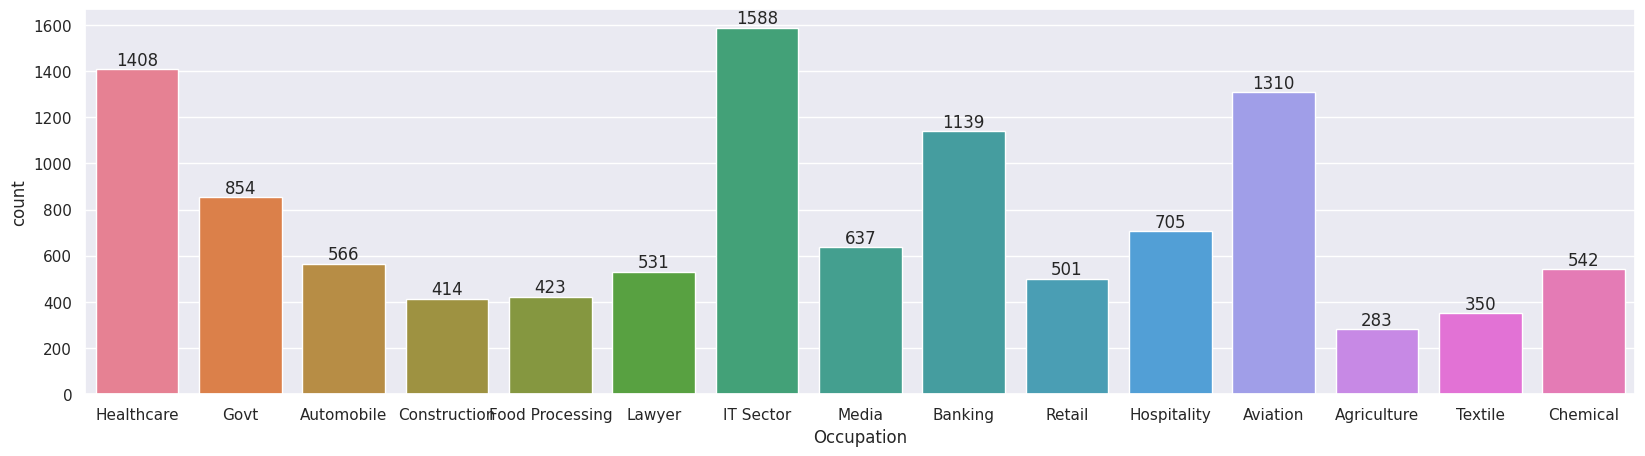

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

## Q16. Draw the countplot to print the top 10 categories

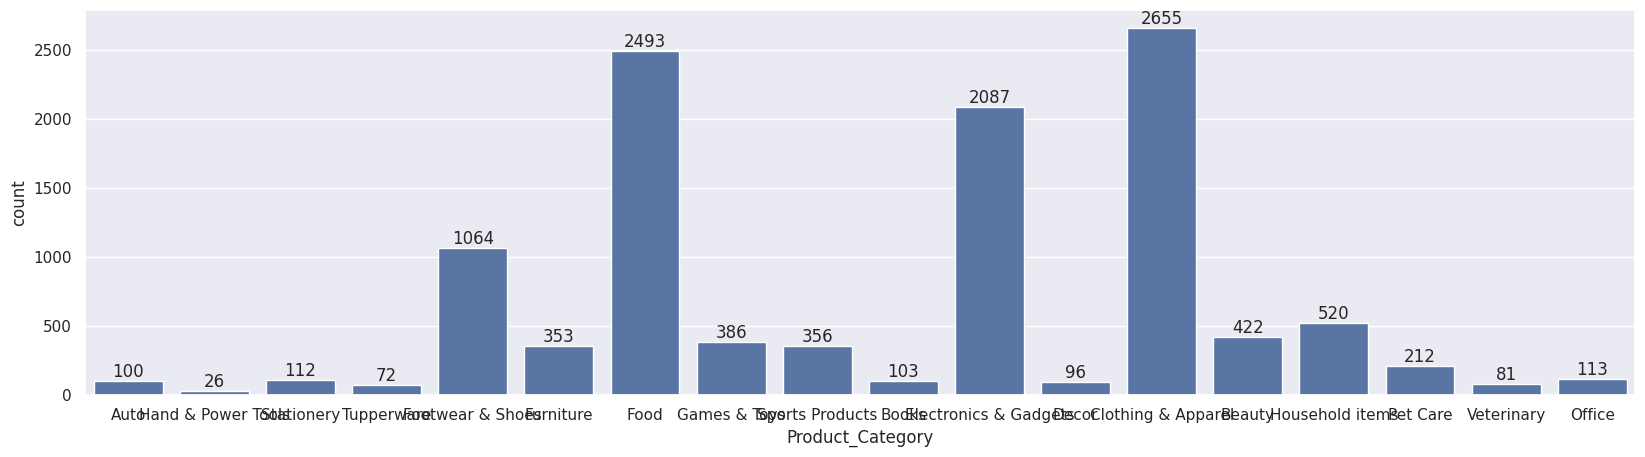

In [15]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

## Q17. What is the prodct ID of the top 10 most sold products.

<Axes: xlabel='Product_Category', ylabel='Amount'>

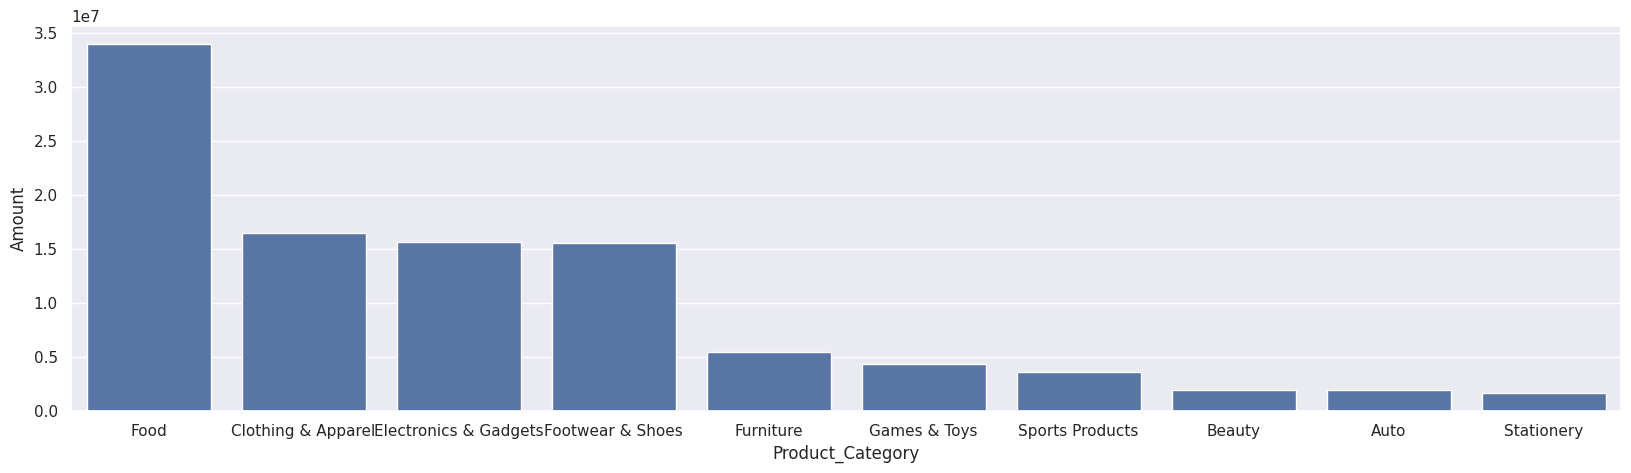

In [16]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

## Q18. What conclusion you can draw from the above visualizations.

<Axes: xlabel='Product_ID'>

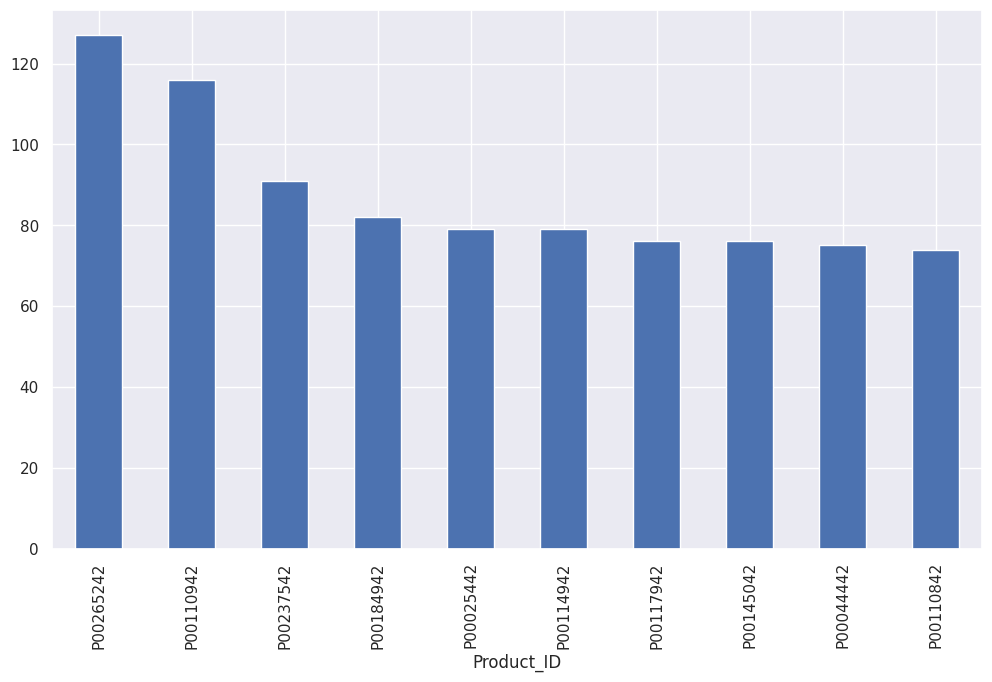

In [14]:
# top 10 most sold products (same thing as above)
import matplotlib.pyplot as plt # Import matplotlib.pyplot

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

